In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

# Preparing Data

In [3]:
#load user data
train = pd.read_csv('train.csv')
train

,user_id,article_id,rating
0,1,456,1
1,1,2934,1
2,1,82,1
3,1,1365,1
4,1,221,1
...,...,...,...
16726,1087,2242,1
16727,1087,419,1
16728,1087,784,1
16729,1087,1249,1


In [4]:
#load article data
article_df = pd.read_csv('article_info.csv')
article_df

,article_id,website,title,content
0,1025,uxmovement,Comment concevoir une procédure pas à pas que ...,par anthony le 18/07/16 à 8h02 Si une nouvelle...
1,2328,endeavor,Ressources humaines? Seulement si vous optez p...,"«Ambassadeurs», «avocats», «porte-parole» d'un..."
2,2469,linkedin,Deux motions de vente différentes. . . .,J'ai passé pas mal de temps récemment avec des...
3,2590,googleblog,Apprentissage large et profond: mieux avec Ten...,"""Apprenez les règles comme un pro, afin de pou..."
4,697,infoq,Agile: manque de compétences en tests,"Fran O'Hara, directeur et consultant principal..."
...,...,...,...,...
2524,224,techcrunch,Kite veut être le compagnon de programmation e...,La plupart des environnements de développement...
2525,856,issuu,GRI Magazine 4e édition,"GRI, Club, Magazine, résidentiel, industriel, ..."
2526,2817,linkedin,4 tendances macro de la blockchain: où placer ...,Publié le Simon Taylor Suivre Abonné Ne plus s...
2527,839,googleblog,Spotify choisit Google Cloud Platform pour ali...,Ce n'est pas tous les jours que vous déplacez ...


In [5]:
#merge data
dataset = pd.merge(train,article_df,on='article_id')
dataset

,user_id,article_id,rating,website,title,content
0,1,456,1,medium,"Obtenez 6 mois d'accès à Pluralsight, la plus ...","Obtenez 6 mois d'accès à Pluralsight, la plus ..."
1,14,456,1,medium,"Obtenez 6 mois d'accès à Pluralsight, la plus ...","Obtenez 6 mois d'accès à Pluralsight, la plus ..."
2,22,456,1,medium,"Obtenez 6 mois d'accès à Pluralsight, la plus ...","Obtenez 6 mois d'accès à Pluralsight, la plus ..."
3,58,456,1,medium,"Obtenez 6 mois d'accès à Pluralsight, la plus ...","Obtenez 6 mois d'accès à Pluralsight, la plus ..."
4,66,456,3,medium,"Obtenez 6 mois d'accès à Pluralsight, la plus ...","Obtenez 6 mois d'accès à Pluralsight, la plus ..."
...,...,...,...,...,...,...
16726,1061,2584,1,buytaert,Vidéo: Pouvons-nous sauver le Web ouvert? par ...,"En mars, j'ai fait une présentation à SxSW qui..."
16727,1067,2372,1,mobiforge,Le Web est Doom - MobiForge,"En juillet 2015, j'ai suggéré que le poids moy..."
16728,1067,2511,1,smashingmagazine,Pourquoi vous devriez arrêter d'installer votr...,"Avez-vous entendu parler de Docker, mais avez-..."
16729,1083,320,3,saiadolugar,"Benchmarking: qu'est-ce que c'est, comment ça ...",Tous ceux qui rêvent d'ouvrir leur propre entr...


In [33]:
#mean ratings
ratings = pd.DataFrame(dataset.groupby('title')['rating'].mean())
ratings

,rating
title,
"""La disruption ne dépend pas de la technologie, elle dépend des gens"": les leçons du co-fondateur de Waze - Startupi",1.000000
"""Les consultants favorisent la dévaluation de notre activité"" - Meio & Mensagem",2.380952
"""Les entreprises innovantes ne fabriquent pas de produits - elles construisent des concepts qui deviennent des expériences irrésistibles""",2.200000
"""Logout"" n'est pas un verbe",1.000000
"""Mangez, dormez, codez, répétez"" est une connerie - Signal contre bruit",1.555556
...,...
Être sous votre code: les sept étapes de la transformation numérique,1.000000
"Être un bon leader dépend d'un certain nombre de facteurs. Mais l'un d'eux, selon l'Anglais Simon Sinek, est très important: le courage de protéger les équipes et de prendre des risques quand c'est nécessaire.",1.500000
Île Shutter (2010),1.333333


In [34]:
#number of ratings
ratings['num ratings'] = pd.DataFrame(dataset.groupby('title')['rating'].count())
ratings

,rating,num ratings
title,,
"""La disruption ne dépend pas de la technologie, elle dépend des gens"": les leçons du co-fondateur de Waze - Startupi",1.000000,2
"""Les consultants favorisent la dévaluation de notre activité"" - Meio & Mensagem",2.380952,21
"""Les entreprises innovantes ne fabriquent pas de produits - elles construisent des concepts qui deviennent des expériences irrésistibles""",2.200000,5
"""Logout"" n'est pas un verbe",1.000000,2
"""Mangez, dormez, codez, répétez"" est une connerie - Signal contre bruit",1.555556,18
...,...,...
Être sous votre code: les sept étapes de la transformation numérique,1.000000,2
"Être un bon leader dépend d'un certain nombre de facteurs. Mais l'un d'eux, selon l'Anglais Simon Sinek, est très important: le courage de protéger les équipes et de prendre des risques quand c'est nécessaire.",1.500000,22
Île Shutter (2010),1.333333,3


In [35]:
#mean ratings in ascending order
dataset.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Filtre d'espace de travail                                                                                                               5.0
Annonce des Acquia Engage Awards                                                                                                         5.0
Whirlpool Vessi met une microbrasserie dans votre cuisine | Nouvelles | Geek.com                                                         5.0
Google IO 2016: un regard sur comment ne pas organiser un grand événement                                                                5.0
Rapport sur les tendances Internet essentielles de Mary Meeker 2016                                                                      5.0
                                                                                                                                        ... 
L'iPod d'origine a 15 ans                                                                                                                1.0
L'histo

In [36]:
#number of ratings in ascending order
dataset.groupby('title')['rating'].count().sort_values(ascending=False)

title
L'ancien coach de carrière de Google partage une astuce visuelle pour savoir quoi faire de votre vie     122
Le nouveau bourreau de travail travaille, fait du sport et passe du temps en famille. Lire la suite       91
Livre: Rétrospectives amusantes                                                                           90
Un milliard de fichiers montrent qui gagne les onglets contre le différend espaces entre programmeurs     73
Ne documentez pas votre code. Codez votre documentation.                                                  71
                                                                                                        ... 
Tendances YouTube et WebVideo - Startupi                                                                   1
Les 17 équations qui ont changé le monde                                                                   1
Facebook dit que plus de 10 000 développeurs construisent des chatbots, des analyses à venir               1
Leonardo Dica

# Data Visualization

<AxesSubplot:>

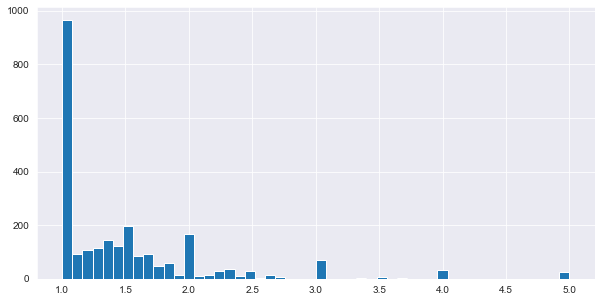

In [43]:
plt.figure(figsize=(10,5))
ratings['rating'].hist(bins=50)

<AxesSubplot:>

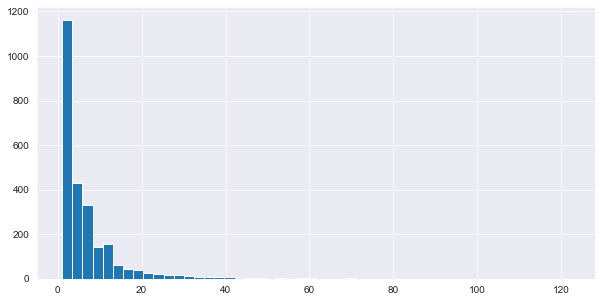

In [44]:
plt.figure(figsize=(10,5))
ratings['num ratings'].hist(bins=50)

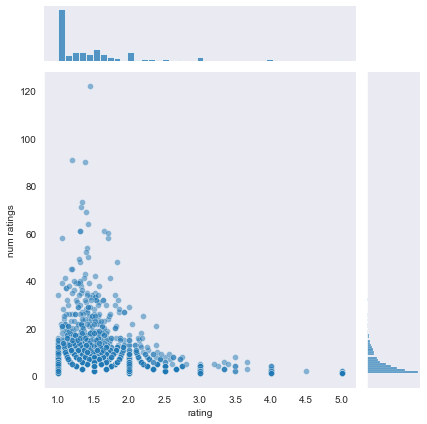

In [45]:
sns.jointplot(x='rating',y='num ratings',data=ratings,alpha=0.5)

# Recommendation System

In [46]:
#matrix having user ids as rows, article titles as columns, and values as ratings
article_matrix = dataset.pivot_table(index='user_id',columns='title',values='rating')
article_matrix

title,"""La disruption ne dépend pas de la technologie, elle dépend des gens"": les leçons du co-fondateur de Waze - Startupi","""Les consultants favorisent la dévaluation de notre activité"" - Meio & Mensagem","""Les entreprises innovantes ne fabriquent pas de produits - elles construisent des concepts qui deviennent des expériences irrésistibles""","""Logout"" n'est pas un verbe","""Mangez, dormez, codez, répétez"" est une connerie - Signal contre bruit","""Non, vous n'acceptez pas encore l'homosexualité ...""","""Nous n'embauchons que les meilleurs"" - Signal v. Noise",# 188. Profession: Chef de projet par cerveaux9,# Sentaquelávemtextão,#FinTech est une question de design centré sur l'humain - Le blog de Chris Skinner,...,Évaluer la sécurité des modules de contribution Drupal,Événement en direct: dévoilement du plan directeur de GitLab,Êtes-vous un déni de Bitcoin? - Le blog de Chris Skinner,Être développeur après 40 ans,Être développeur après 40 ans - Camp de code gratuit,Être sous votre code: les sept étapes de la transformation numérique,"Être un bon leader dépend d'un certain nombre de facteurs. Mais l'un d'eux, selon l'Anglais Simon Sinek, est très important: le courage de protéger les équipes et de prendre des risques quand c'est nécessaire.",Île Shutter (2010),éblouissement: StranglerApplication,ŷhat | Classification des chiffres manuscrits à l'aide de TensorFlow
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
ratings.sort_values('num ratings',ascending=False)

,rating,num ratings
title,,
L'ancien coach de carrière de Google partage une astuce visuelle pour savoir quoi faire de votre vie,1.442623,122
"Le nouveau bourreau de travail travaille, fait du sport et passe du temps en famille. Lire la suite",1.197802,91
Livre: Rétrospectives amusantes,1.377778,90
Un milliard de fichiers montrent qui gagne les onglets contre le différend espaces entre programmeurs,1.328767,73
Ne documentez pas votre code. Codez votre documentation.,1.323944,71
...,...,...
Tendances YouTube et WebVideo - Startupi,1.000000,1
Les 17 équations qui ont changé le monde,1.000000,1
"Facebook dit que plus de 10 000 développeurs construisent des chatbots, des analyses à venir",1.000000,1


In [49]:
#user ratings of the article for which we want recommendations
article1_user_ratings = article_matrix["L'ancien coach de carrière de Google partage une astuce visuelle pour savoir quoi faire de votre vie"]
article1_user_ratings

user_id
1      NaN
2      NaN
3      NaN
5      NaN
7      NaN
        ..
1083   NaN
1084   NaN
1085   NaN
1086   NaN
1087   NaN
Name: L'ancien coach de carrière de Google partage une astuce visuelle pour savoir quoi faire de votre vie, Length: 907, dtype: float64

In [52]:
#correlation with other articles
similar_articles = article_matrix.corrwith(article1_user_ratings)
corr_articles = pd.DataFrame(similar_articles,columns=['Correlation'])
corr_articles.dropna(inplace=True)
corr_articles

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\anaconda\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
# Sentaquelávemtextão,-1.000000
10 erreurs de sur-ingénierie des logiciels modernes,-0.322329
12 Hacks JavaScript,-1.000000
14 modules Cool Drupal 8 pour les constructeurs de sites | Août 2016,-1.000000
15 minutes sur Docker,1.000000
...,...
"À l'intérieur de Nubank, découvrez les secrets de la fintech la plus célèbre du pays",0.166667
À quoi s'attendre à la WWDC 2016,-1.000000
Écrire du bon code: comment réduire la charge cognitive de votre code,0.500000


In [53]:
corr_articles.sort_values('Correlation',ascending=False)

,Correlation
title,
MITSUBISHI ASX 2.0 4X4 AWD 16V ESSENCE 4P AUTOMATIQUE - WebMotors - 17115683,1.0
Le Lean IT est une question de personnes - Le Lean IT est axé sur les personnes,1.0
Ce sont les 10 marques les plus achetées au monde,1.0
Revue - L'arrivée,1.0
Construire la qualité dans: la clé de la livraison continue dans Kanban,1.0
...,...
"Au Brésil, «25% des téléphones portables sont encore des« burrophones »",-1.0
Les URI sympas ne changent pas,-1.0
Tous ensemble maintenant. Présentation de G Suite.,-1.0


The correlation is very high because it may happen the many articles are only read once by the users who read the article1

In [60]:
#combine number of ratings
corr_articles = corr_articles.join(ratings['num ratings'])
corr_articles

,Correlation,num ratings
title,,
# Sentaquelávemtextão,-1.000000,22
10 erreurs de sur-ingénierie des logiciels modernes,-0.322329,54
12 Hacks JavaScript,-1.000000,14
14 modules Cool Drupal 8 pour les constructeurs de sites | Août 2016,-1.000000,12
15 minutes sur Docker,1.000000,27
...,...,...
"À l'intérieur de Nubank, découvrez les secrets de la fintech la plus célèbre du pays",0.166667,20
À quoi s'attendre à la WWDC 2016,-1.000000,4
Écrire du bon code: comment réduire la charge cognitive de votre code,0.500000,11


In [61]:
#sort the correlation valuesand only select those articles that have number of ratings greater than the threshold value
corr_articles[corr_articles['num ratings']>50].sort_values('Correlation',ascending=False).head(6)

,Correlation,num ratings
title,,
L'ancien coach de carrière de Google partage une astuce visuelle pour savoir quoi faire de votre vie,1.000000,122
Soyez intelligent au travail: améliorez la communication de l'entreprise avec 12 robots,0.438397,61
Un psychologue de Harvard dit que les gens vous jugent en quelques secondes selon ces critères | Journal de l'entrepreneur,0.388763,60
"Le nouveau bourreau de travail travaille, fait du sport et passe du temps en famille. Lire la suite",0.249136,91
Le patron est gay. Et?,0.158114,52
Mon voyage à la maternité #tetodomundo,0.081089,61


Above are Top 5 recommended articles similar to article1